This notebook will explore the statistics of the NBA players in the 2024-2025 season. Then we will compare them with the corresponding year's salary data, and see who really deserved their payment that year.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stats_df = pd.read_csv("data/player_statistics.csv")
stats_df['Player'] = stats_df['Player'].str.strip()
numeric_cols = ['Age', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']
stats_df.dropna(subset=numeric_cols, inplace=True)
for col in numeric_cols:
    stats_df[col] = pd.to_numeric(stats_df[col])
stats_df.head()


,Rk,Player,Age,Pos,MP,TRB,AST,STL,BLK,TOV,PTS,Player-additional
0,1,Precious Achiuwa,25,C,1170,9.8,1.7,1.4,1.3,1.4,11.7,achiupr01
1,2,Steven Adams,31,C,794,14.8,3.0,1.0,1.3,2.4,10.2,adamsst01
2,3,Bam Adebayo,27,C,2674,10.1,4.5,1.3,0.7,2.2,19.0,adebaba01
3,4,Ochai Agbaji,24,SG,1739,5.0,2.0,1.2,0.6,1.1,13.8,agbajoc01
4,5,Santi Aldama,24,PF,1660,9.0,4.1,1.1,0.6,1.5,17.6,aldamsa01


In [19]:
salary_df = pd.read_csv("data/player_salaries.csv")
salary_df['Salary_USD'] = (salary_df['Salary'].astype(str).str.replace('$', '').str.replace(',', '').str.strip().astype(float))
salary_df.drop_duplicates(subset=['Player'], keep='first', inplace=True) 
salary_df['Player'] = salary_df['Player'].str.strip()
salary_df.dropna(subset=['Salary_USD'], inplace=True)
salary_df.head()


,Player,Team,Salary,Salary_USD
0,Stephen Curry,GSW,"$55,761,216",55761216.0
1,Joel Embiid,PHI,"$51,415,938",51415938.0
2,Nikola Jokic,DEN,"$51,415,938",51415938.0
3,Kevin Durant,PHO,"$51,179,021",51179021.0
4,Bradley Beal,PHO,"$50,203,930",50203930.0


We will now combine the two datasets and create two features to analyze the performance of the players and the ratio of their performance/pay. Namely Composite Performance Index (CPI) and Value Per Dollar (VPD).

In [23]:
combined_df = pd.merge(stats_df, salary_df[['Player', 'Salary_USD']])
combined_df['CPI'] = (combined_df['PTS'] + combined_df['TRB'] + combined_df['AST'] + combined_df['STL'] + combined_df['BLK'] - combined_df['TOV'])
combined_df['Value_Per_Dollar'] = (combined_df['CPI'] / combined_df['Salary_USD']) * 1_000_000

combined_df.head()

,Rk,Player,Age,Pos,MP,TRB,AST,STL,BLK,TOV,PTS,Player-additional,Salary_USD,CPI,Value_Per_Dollar
0,1,Precious Achiuwa,25,C,1170,9.8,1.7,1.4,1.3,1.4,11.7,achiupr01,6000000.0,24.5,4.083333
1,2,Steven Adams,31,C,794,14.8,3.0,1.0,1.3,2.4,10.2,adamsst01,12600000.0,27.9,2.214286
2,3,Bam Adebayo,27,C,2674,10.1,4.5,1.3,0.7,2.2,19.0,adebaba01,34848340.0,33.4,0.958439
3,4,Ochai Agbaji,24,SG,1739,5.0,2.0,1.2,0.6,1.1,13.8,agbajoc01,4310280.0,21.5,4.988075
4,5,Santi Aldama,24,PF,1660,9.0,4.1,1.1,0.6,1.5,17.6,aldamsa01,3960531.0,30.9,7.801984


Scatter Plot -- DPI vs Salary

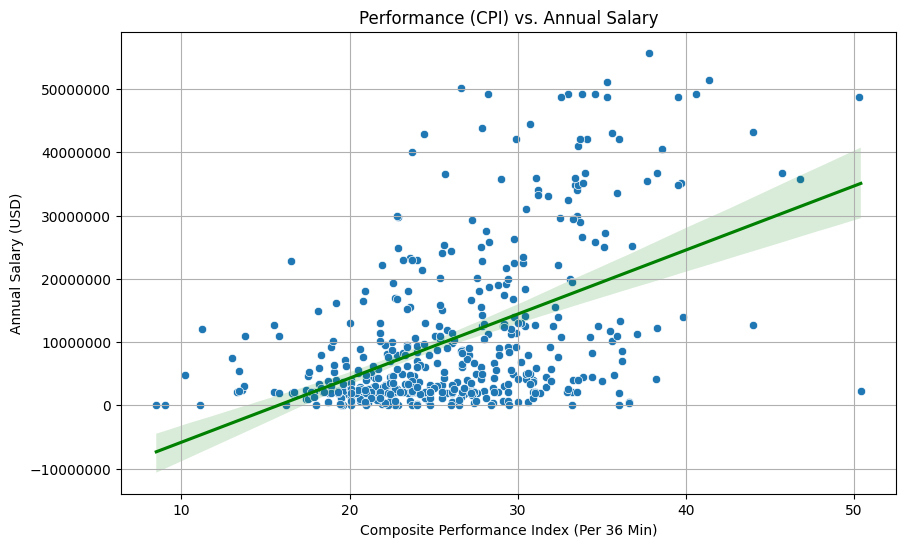

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Salary_USD', data=combined_df)
sns.regplot(x='CPI', y='Salary_USD', data=combined_df, scatter=False, color='green')
plt.title('Performance (CPI) vs. Annual Salary')
plt.xlabel('Composite Performance Index (Per 36 Min)')
plt.ylabel('Annual Salary (USD)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, alpha=1)
plt.show()